In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
RANDOM_STATE = 42

In [18]:
data = pd.read_csv("breast_cancer_survival.csv")
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [19]:
from sklearn.model_selection import train_test_split
column_name_mapping={'ER status':'ERstatus','PR status':'PRstatus','HER2 status':'HER2status'}
data.rename(columns=column_name_mapping,inplace=True)

data.Patient_Status[data.Patient_Status == 'Dead'] = 0

data.Patient_Status[data.Patient_Status == 'Alive'] = 1

data.HER2status[data.HER2status == 'Positive'] = 1

data.HER2status[data.HER2status == 'Negative'] = 0

data.Tumour_Stage[data.Tumour_Stage == 'II'] = 2

data.Tumour_Stage[data.Tumour_Stage == 'I'] = 1

data.Tumour_Stage[data.Tumour_Stage == 'III'] = 3

data.Surgery_type[data.Surgery_type == 'Other'] = 1

data.Surgery_type [data.Surgery_type == 'Lumpectomy'] = 2
data.Surgery_type[data.Surgery_type == 'Modified Radical Mastectomy'] = 3

data.Surgery_type[data.Surgery_type == 'Simple Mastectomy'] = 4

data = data.dropna()
print(data)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340            2   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320            2   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815            2   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            1   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210            2   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320            2   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            1   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860            2   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820            2   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050            2   

                          Histology  ERstatus  PRstatus HER2status  \
0     Infiltrating Ductal Carcinoma  Positive  Positi

<ipython-input-19-c94f377eeecc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Patient_Status[data.Patient_Status == 'Dead'] = 0
<ipython-input-19-c94f377eeecc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Patient_Status[data.Patient_Status == 'Alive'] = 1
<ipython-input-19-c94f377eeecc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.HER2status[data.HER2status == 'Positive'] = 1
<ipython-input-19-c94f377eeecc>:11

In [20]:
from sklearn.model_selection import train_test_split
x= data.drop(columns = ['Date_of_Surgery', 'Date_of_Last_Visit', 'Histology', "Gender", 'ERstatus', 'PRstatus'])
y = data['Patient_Status']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=RANDOM_STATE)
print(y_train.value_counts())
print(y_test.value_counts())

1    192
0     45
Name: Patient_Status, dtype: int64
1    63
0    17
Name: Patient_Status, dtype: int64


In [21]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [22]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()

model.fit(x_train, y_train)

DecisionTreeClassifier()

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


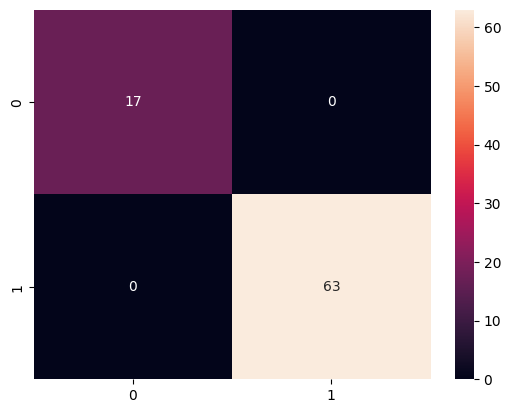

In [24]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()